# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# import math and data processing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(style="darkgrid")
# sns.set(color_codes=True)    # adds a nice background to the graphs
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# set statsmodels specific warning suppression
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# import logistic regression model functionality from statsmodels library
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant


# import logistic regression as well as decision tree sklearn library functionality
# import class to create training and test data
from sklearn.model_selection import train_test_split

# import logistic regression class
from sklearn.linear_model import LogisticRegression

# import decision tree classifier class
from sklearn.tree import DecisionTreeClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# import deecision tree utility class
import sklearn.tree as tree

# import generic class for machine learning performance metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# sundry functions to get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer
)




## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv('INNHotelsGroup.csv')
inn_df = data.copy()

In [3]:
inn_df.Booking_ID.nunique()

36275

### There are no duplicate records in the data because the Booking_ID column consists of unique values

In [4]:
inn_df.sample(n=5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
8400,INN08401,3,0,0,1,Meal Plan 1,0,Room_Type 1,8,2018,11,5,Offline,0,0,0,160.00,0,Not_Canceled
34131,INN34132,2,1,0,1,Meal Plan 1,0,Room_Type 1,108,2018,10,25,Online,0,0,0,69.99,2,Not_Canceled
1677,INN01678,3,0,2,0,Meal Plan 1,0,Room_Type 4,24,2018,5,1,Online,0,0,0,172.00,2,Not_Canceled
9618,INN09619,2,0,0,3,Meal Plan 1,0,Room_Type 1,8,2017,9,3,Online,0,0,0,117.67,2,Not_Canceled
24986,INN24987,1,0,0,2,Meal Plan 1,0,Room_Type 1,21,2017,12,17,Corporate,0,0,0,65.00,0,Not_Canceled


In [5]:
inn_df.shape

(36275, 19)

In [6]:
inn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
inn_df.any().isna()

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

In [8]:
# simplify feature names in anticipation of hot encoding
inn_df.rename(columns={'room_type_reserved':'reserved'}, inplace=True)
inn_df.rename(columns={'market_segment_type':'market_type'}, inplace=True)

In [9]:
inn_df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [10]:
# remove all spaces in column names in anticipation of modeling to avoid any pitfalls of
# performance or malfunction
inn_df.columns = inn_df.columns.str.replace(' ', '_')

In [11]:
inn_df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [12]:
numeric_features = inn_df.select_dtypes(exclude='object')
non_numeric_features = inn_df.select_dtypes(include='object')
non_numeric_features.columns

Index(['Booking_ID', 'type_of_meal_plan', 'reserved', 'market_type',
       'booking_status'],
      dtype='object')

In [13]:
# print out the values of the categorical variables
# create a hot encoding list that excludes the Booking_ID, the record unique identifier,
# type_of_meal_plan, that has a ranking, and booking_status, which is the target variable
hot_encoding_lst = []
for feature in non_numeric_features:
    # filter out the Booking_ID, type_of_meal_plan, and booking_status
    if(feature == 'Booking_ID' or feature == 'type_of_meal_plan' or feature == 'booking_status'):
        continue
    hot_encoding_lst.append(feature)
    print(feature)
    print('*' * 25)
    print('')
    print(inn_df[feature].value_counts())
    print('')

reserved
*************************

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: reserved, dtype: int64

market_type
*************************

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_type, dtype: int64



In [14]:
hot_encoding_lst

['reserved', 'market_type']

In [14]:
# type_of_meal_plan variable values have an order that is cost reflective therefore
# the textual values can be mapped to numeric values that reflect this ordering
# Not Selected – No meal plan selected
# Meal Plan 1 – Breakfast
# Meal Plan 2 – Half board (breakfast and one other meal)
# Meal Plan 3 – Full board (breakfast, lunch, and dinner)
# -1 will be adopted for the 'Not Selected' value

inn_df.type_of_meal_plan.replace({'Not Selected': -1, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3}, inplace=True)

In [15]:
# change the value of the booking_status column to a logical value of 0 and 1
# in place of Not_Canceled and Canceled respectively
inn_df.booking_status.replace({'Not_Canceled':0, 'Canceled':1}, inplace=True)


In [16]:
# change the data type of booking_status to numeric
inn_df.booking_status = inn_df.booking_status.astype('int64')


In [17]:
inn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  int64  
 6   required_car_parking_space            36275 non-null  int64  
 7   reserved                              36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Change the categorical fields to numeric for modelling

In [18]:
# one hot encode categorical features
inn_df=pd.get_dummies(inn_df, columns=hot_encoding_lst, drop_first=True)

In [19]:
inn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  int64  
 6   required_car_parking_space            36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  repeated_guest 

#### There are no missing values in the data

In [20]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

1. What are the busiest months in the hotel?

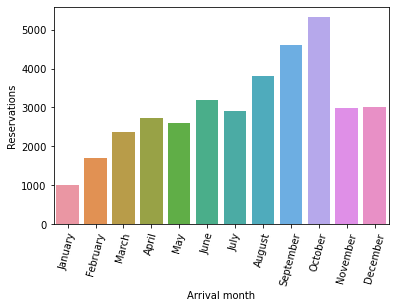

In [22]:
# get frequency of reservations by month based upon the arrival_month column
sns.barplot(x=inn_df.arrival_month.value_counts().index, y=inn_df.arrival_month.value_counts())
plt.xlabel('Arrival month')
plt.ylabel('Reservations')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['January', 'February', 'March', 'April', \
        'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=75)
plt.show()

In [23]:
inn_df.arrival_month.value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

#### August, September, October, are the busiest months with 5317, 4611, and 3813 reservations respectively.

2. Which market segment do most of the guests come from?

In [24]:
data.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

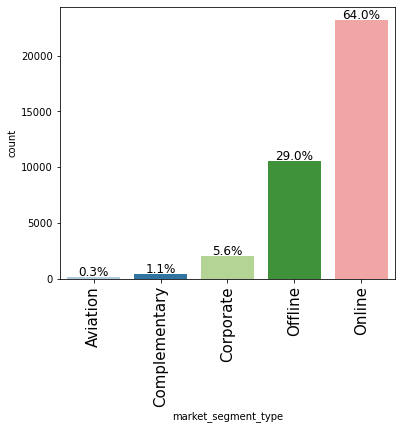

In [26]:
labeled_barplot(data, 'market_segment_type', perc=True, n=None)

#### Majority of room reservations come from the online segment of the market

3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

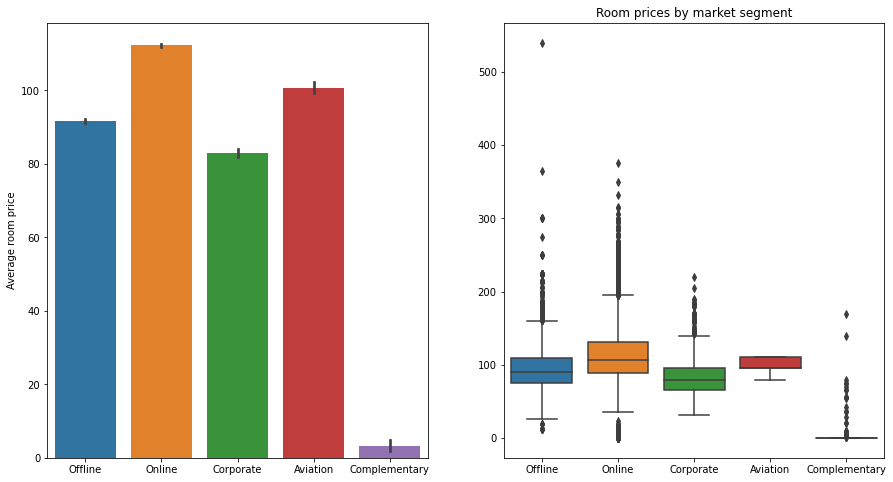

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(y=data.avg_price_per_room, x=data.market_segment_type, ax=axs[0])
# plt.xlabel('Market segment')
# plt.ylabel('Price')
sns.boxplot(y=data.avg_price_per_room, x=data.market_segment_type, ax=axs[1])
axs[1].set_title('Room prices by market segment')
axs[0].set_ylabel('Average room price')
axs[0].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
plt.show()

#### The online market has the highest average room prices, followed by the aviation, offline, corporate, and lowest complimentary.

4. What percentage of bookings are canceled?

In [26]:
canceled_reservations = inn_df.booking_status.value_counts()[1]
total_reservation = inn_df.booking_status.value_counts().sum()
print(f'{np.round((canceled_reservations / total_reservation) * 100.0, 2)} percent of reservations get canceled.')

32.76 percent of reservations get canceled.


5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [27]:
repeated_customer = inn_df[inn_df.repeated_guest == 1]
canceled = repeated_customer.booking_status.value_counts()[1]
reserved = repeated_customer.booking_status.value_counts().sum()
print(f'Only {np.round((canceled / reserved) * 100.0, 2)} percent of reservations get canceled by repeating customers.')

Only 1.72 percent of reservations get canceled by repeating customers.


6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

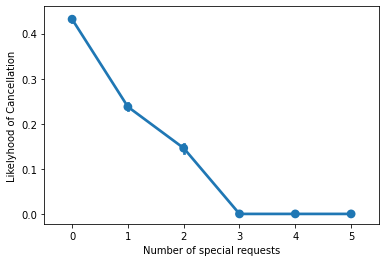

In [28]:
sns.pointplot(x=inn_df.no_of_special_requests, y=inn_df.booking_status)
plt.xlabel('Number of special requests')
plt.ylabel('Likelyhood of Cancellation')
plt.show()

#### The plot suggests that there is less likelyhood of a cancellation when special requests are placed - that no cancellations occur for reservations with 3 or more special requests.

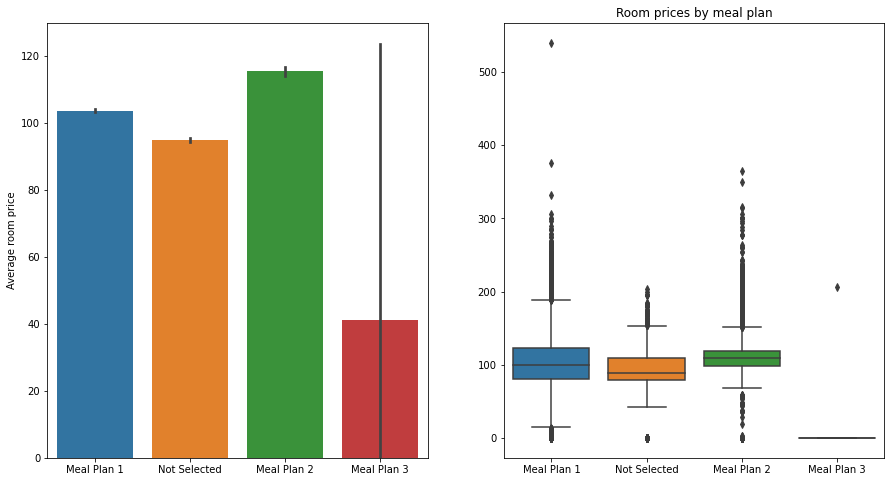

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(y=data.avg_price_per_room, x=data.type_of_meal_plan, ax=axs[0])
sns.boxplot(y=data.avg_price_per_room, x=data.type_of_meal_plan, ax=axs[1])
axs[1].set_title('Room prices by meal plan')
axs[0].set_ylabel('Average room price')
axs[0].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
plt.show()

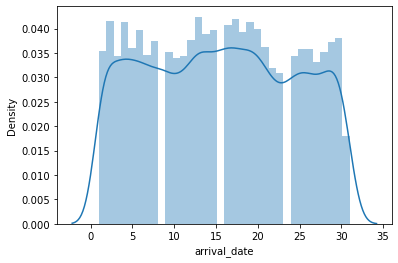

In [30]:
sns.distplot(inn_df.arrival_date)
plt.show()

#### The arrival day frequency is fairly uniform in occurence with little bias towards any particular day of the week

### Additional EDA

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


#### There seems to be a very low cancellation rate for customers that previously have not been cancelling their reservations.

In [32]:
perc_reservations_with_children = (inn_df[inn_df.no_of_children > 0].shape[0]/inn_df.shape[0]) * 100.0

In [33]:
print(f'Only {round(perc_reservations_with_children,2)} percent of reservations include children')

Only 7.44 percent of reservations include children


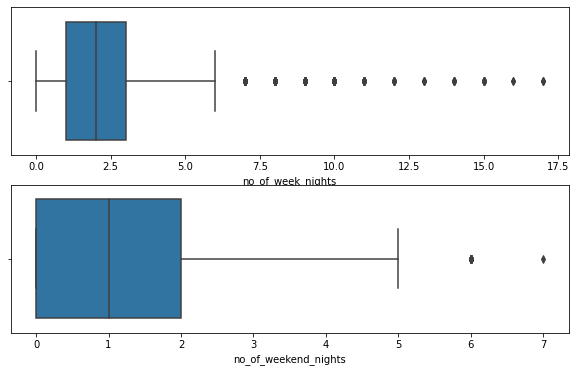

In [34]:
fig, axs = plt.subplots(2,1, figsize=(10,6))
sns.boxplot(inn_df.no_of_week_nights, ax=axs[0])
sns.boxplot(inn_df.no_of_weekend_nights, ax=axs[1])
plt.show()

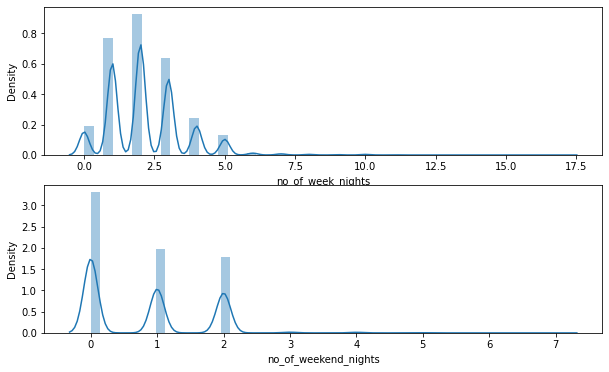

In [35]:
fig, axs = plt.subplots(2,1, figsize=(10,6))
sns.distplot(inn_df.no_of_week_nights, ax=axs[0])
sns.distplot(inn_df.no_of_weekend_nights, ax=axs[1])
plt.show()

* Both the distributions of the week night and weekend patronage are right skewed.
* There is zero occupancy 25% of the time on weekends
* The average occupancy on week nights is approximately 2 days
* The average accupancy for weekend nights is less than one day
* In 75% of the time there is occupancy that ranges between 2 to 3 days on week nights
* The week nights have the maximum guest stays with likely outliers
* There are very few reservations that include children

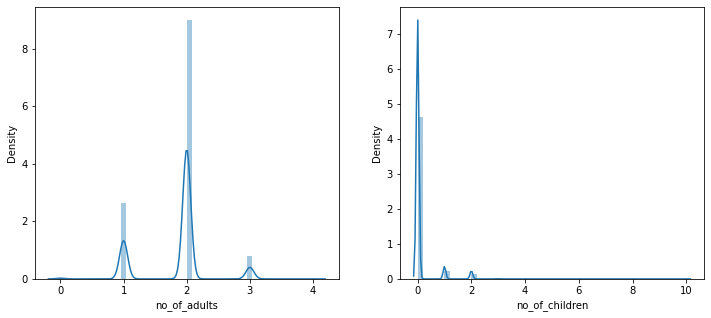

In [36]:
fx, axx = plt.subplots(1,2, figsize=(12,5))
sns.distplot(inn_df.no_of_adults, ax=axx[0])
sns.distplot(inn_df.no_of_children, ax=axx[1])
plt.show()


#### The plot confirms that only a small percentage of reservations are for children

### EDA: lead_time

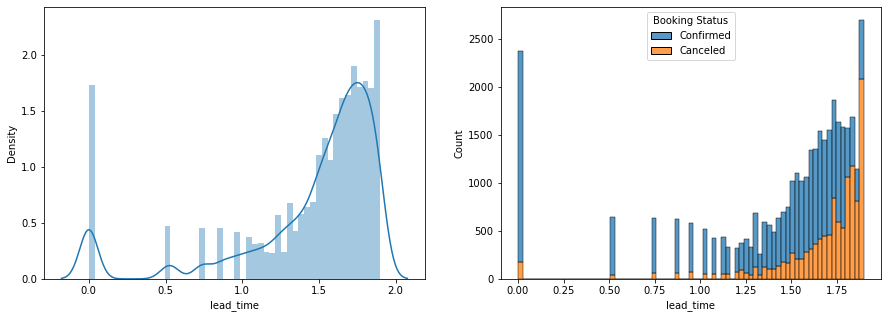

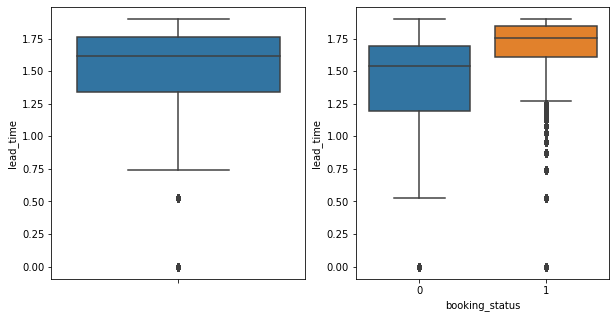

In [137]:
fig1, axs1 = plt.subplots(1,2, figsize=(15,5))
sns.distplot(inn_df.lead_time, ax=axs1[0])
hp = sns.histplot(x=inn_df.lead_time, hue=inn_df.booking_status, ax=axs1[1], multiple='stack')
leg = hp.get_legend()
new_title = 'Booking Status'
leg.set_title(new_title)
new_labels = ['Confirmed', 'Canceled']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
    
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(y=inn_df.lead_time, ax=axs[0])
plt.ylabel('')
plt.xlabel('Advance booking in days')
sns.boxplot(y=inn_df.lead_time, x=inn_df.booking_status, ax=axs[1])
plt.show()

* The lead time distribution is heavily right skewed.
* The median time is 57 days whereas the mean time is approximately 87 days
* The range is broad with a maximum of 443 well in excess of a year
* The longer the lead time, the higher the cancellations
* Most of the cancellations are occuring at lead_times greater than the average

#### Analyze room demand by the type

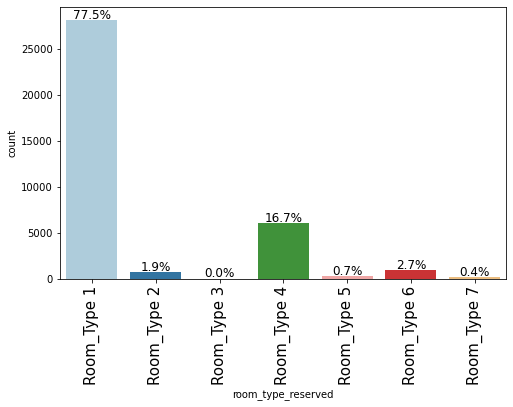

In [39]:
labeled_barplot(data, 'room_type_reserved', perc=True, n=None)

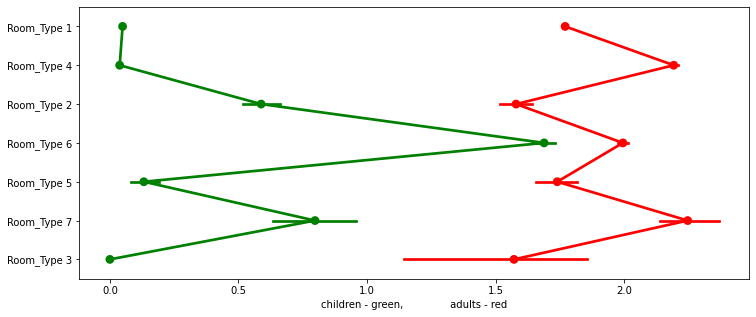

In [41]:
# The pointplot shows within confidence intervals the likelyhood of
# room types being reserved for children and adults 
plt.figure(figsize=(12,5))
sns.pointplot(y=data.room_type_reserved, x=data.no_of_children, color='green')
sns.pointplot(y=data.room_type_reserved, x=data.no_of_adults, color='red')
plt.xlabel('children - green,               adults - red')
plt.ylabel('')
plt.show()

#### Adults are more likely to reserve all the room types for themselves. Room type 6 is the most popularly reserved for children. Room type 3 is never reserved for children and Room types 1, 4, as well as 5 are not popular either for children.


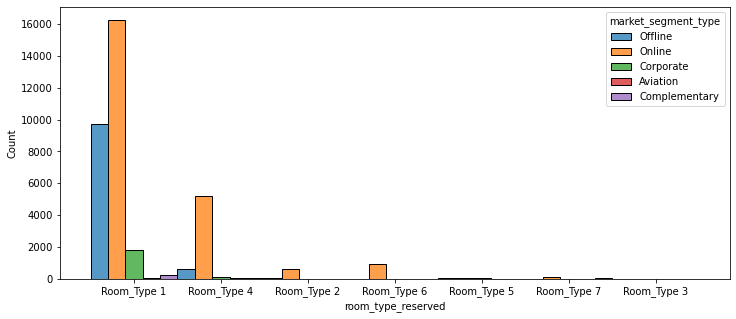

In [40]:
# The histplot shows the frequency of reservation of the room types
# along with a breakdown by market segment 
plt.figure(figsize=(12,5))
sns.histplot(x=data.room_type_reserved, hue=data.market_segment_type, multiple='dodge')
plt.show()

#### It appears like Room type 4 is dedicated to complementary room offers

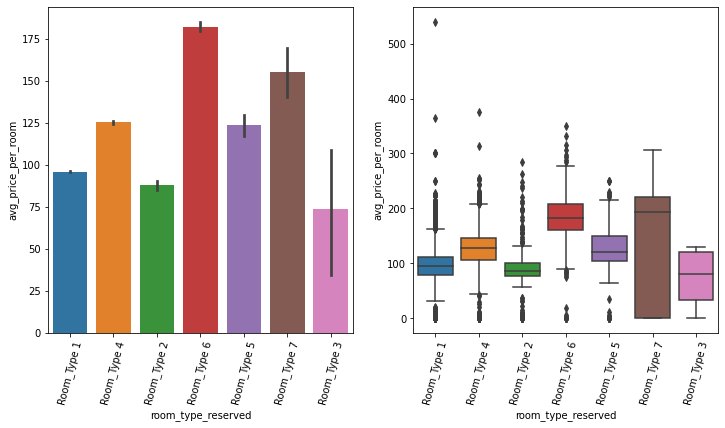

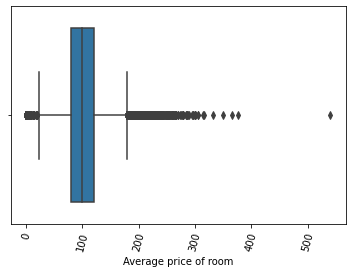

In [41]:
fg, axs2 = plt.subplots(1,2, figsize=(12,6))
f1 = sns.barplot(y=data.avg_price_per_room, x=data.room_type_reserved, ax=axs2[0])
#plt.xticks(rotation=75)
for label in f1.xaxis.get_ticklabels():
    label.set_rotation(75)
    
plt.xlabel('Room type')
plt.ylabel('Average price of room')
f2 = sns.boxplot(x=data.room_type_reserved, y=data.avg_price_per_room, ax=axs2[1])
plt.xticks(rotation=75)
plt.show()

f2 = sns.boxplot(x=data.avg_price_per_room)
plt.xticks(rotation=75)
plt.xlabel('Average price of room')
plt.ylabel('')

plt.show()

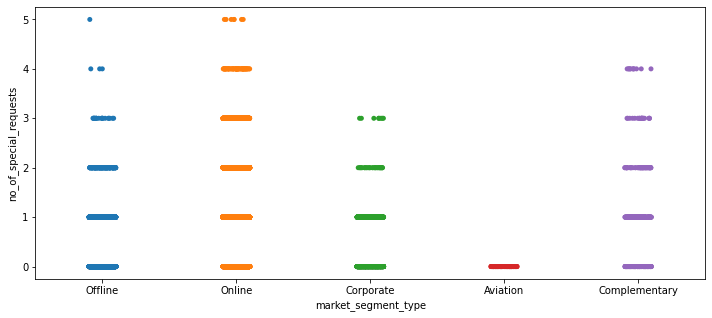

In [42]:
# The pointplot shows within confidence intervals the likelyhood of
# room types being reserved for children and adults 
plt.figure(figsize=(12,5))
sns.stripplot(x=data.market_segment_type, y=data.no_of_special_requests)
plt.show()

### Considering the fact that the complementary market segment is among the smallest, the frequency and number of special requests is high. In contrast, the aviation market doesn't appear to be interested in special requests. 

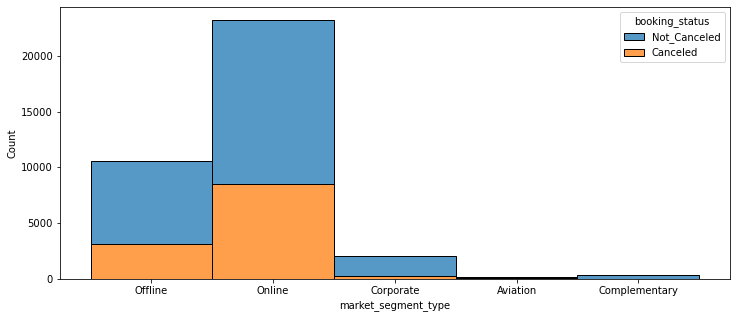

In [43]:
# The pointplot shows within confidence intervals the likelyhood of
# room types being reserved for children and adults 
plt.figure(figsize=(12,5))
sns.histplot(x=data.market_segment_type, hue=data.booking_status, multiple='stack')
plt.show()

### There is zero cancellation rate with the complementary market segment as expected. There is very little cancellation in the corporate market.

## Data Preprocessing

#### Outlier treatment will be carried out ahead of modeling

In [44]:
# certain numeric features will be treated for out liers
numeric_features.columns


Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

#### Most of the features have reasonable values and do not require outlier treatment. The following features in the treatment list will be treated.

In [45]:
treat_list = ['no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'avg_price_per_room']

In [46]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [47]:
inn_df = treat_outliers_all(inn_df, treat_list)

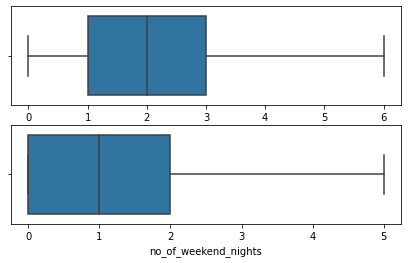

In [48]:
# verify outliers treated
fig, axs = plt.subplots(2,1, figsize=(7,4))
sns.boxplot(inn_df.no_of_week_nights, ax=axs[0])
sns.boxplot(inn_df.no_of_weekend_nights, ax=axs[1])
plt.show()

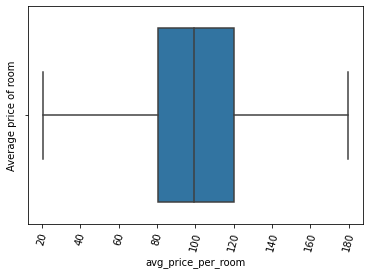

In [49]:
# verify outliers treated
plt.xlabel('Room type')
plt.ylabel('Average price of room')
f2 = sns.boxplot(x=inn_df.avg_price_per_room)
plt.xticks(rotation=75)
plt.show()


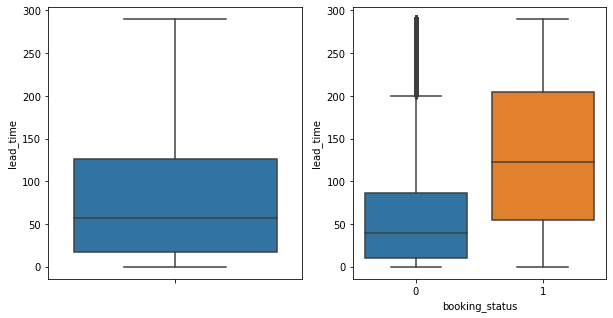

In [50]:
# verify outliers treated
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(y=inn_df.lead_time, ax=axs[0])
plt.ylabel('')
plt.xlabel('Advance booking in days')
sns.boxplot(y=inn_df.lead_time, x=inn_df.booking_status, ax=axs[1])
plt.show()

In [51]:
# replace all spaces in column names with underscores
inn_df.columns = inn_df.columns.str.replace(' ', '_')

In [52]:
inn_df.sample(n=5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,reserved_Room_Type_2,reserved_Room_Type_3,reserved_Room_Type_4,reserved_Room_Type_5,reserved_Room_Type_6,reserved_Room_Type_7,market_type_Complementary,market_type_Corporate,market_type_Offline,market_type_Online
23072,INN23073,1,0,0,2,1,0,32.0,2017,11,20,0,0,0,73.00,0,0,0,0,0,0,0,0,0,0,1,0
24099,INN24100,2,0,1,2,1,0,289.5,2018,9,26,0,0,0,75.00,0,1,0,0,0,0,0,0,0,0,1,0
14849,INN14850,2,2,1,0,1,0,36.0,2018,8,7,0,0,0,179.55,2,0,0,0,0,0,0,1,0,0,0,1
32500,INN32501,2,0,1,3,1,0,3.0,2018,8,25,0,0,0,110.80,1,0,0,0,1,0,0,0,0,0,0,1
26941,INN26942,2,0,0,3,1,0,93.0,2018,4,6,0,0,0,90.30,1,0,0,0,0,0,0,0,0,0,0,1


In [71]:
#inn_df['lead_time'] = np.log(inn_df['lead_time'] + 1)

In [73]:
# drop redundant data: Booking_ID is the unique identifier of the room reservation
# but does not play any role either in EDA or modeling

inn_df.drop('Booking_ID', axis=1, inplace=True)
# save a copy of the preprocessed data
data2 = inn_df.copy()

KeyError: "['Booking_ID'] not found in axis"

### Evaluating more predictors against the target

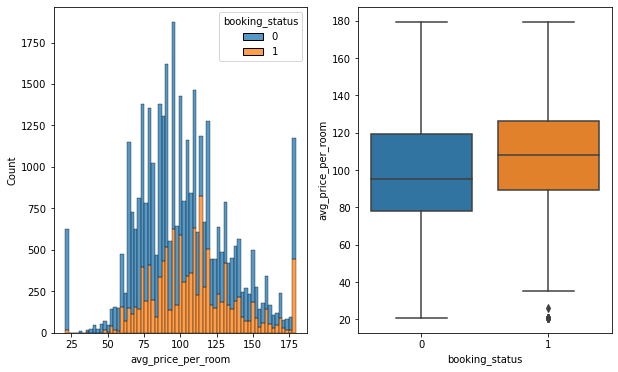

In [56]:
fz, axz = plt.subplots(1,2, figsize=(10,6))
sns.histplot(x=inn_df.avg_price_per_room, hue=inn_df.booking_status, multiple='stack', ax=axz[0])
sns.boxplot(y=inn_df.avg_price_per_room, x=inn_df.booking_status, ax=axz[1])
plt.show()

### Average room prices appear normally distributed in the histogram. The average prices for cancelled bookings follows a similar normal pattern. However, the cancellations seem to be taken place at a comparatively higher average price. 

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [57]:
inn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.00,2.000000,2.000000,2.000000,4.000000
no_of_children,36275.0,0.105279,0.402648,0.00,0.000000,0.000000,0.000000,10.000000
no_of_weekend_nights,36275.0,0.810117,0.867339,0.00,0.000000,1.000000,2.000000,5.000000
no_of_week_nights,36275.0,2.177836,1.290622,0.00,1.000000,2.000000,3.000000,6.000000
type_of_meal_plan,36275.0,0.808546,0.787847,-1.00,1.000000,1.000000,1.000000,3.000000
required_car_parking_space,36275.0,0.030986,0.173281,0.00,0.000000,0.000000,0.000000,1.000000
lead_time,36275.0,-inf,NaN,-inf,2.833213,4.043051,4.836282,5.668155
arrival_year,36275.0,2017.820427,0.383836,2017.00,2018.000000,2018.000000,2018.000000,2018.000000
arrival_month,36275.0,7.423653,3.069894,1.00,5.000000,8.000000,10.000000,12.000000
arrival_date,36275.0,15.596995,8.740447,1.00,8.000000,16.000000,23.000000,31.000000


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [58]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

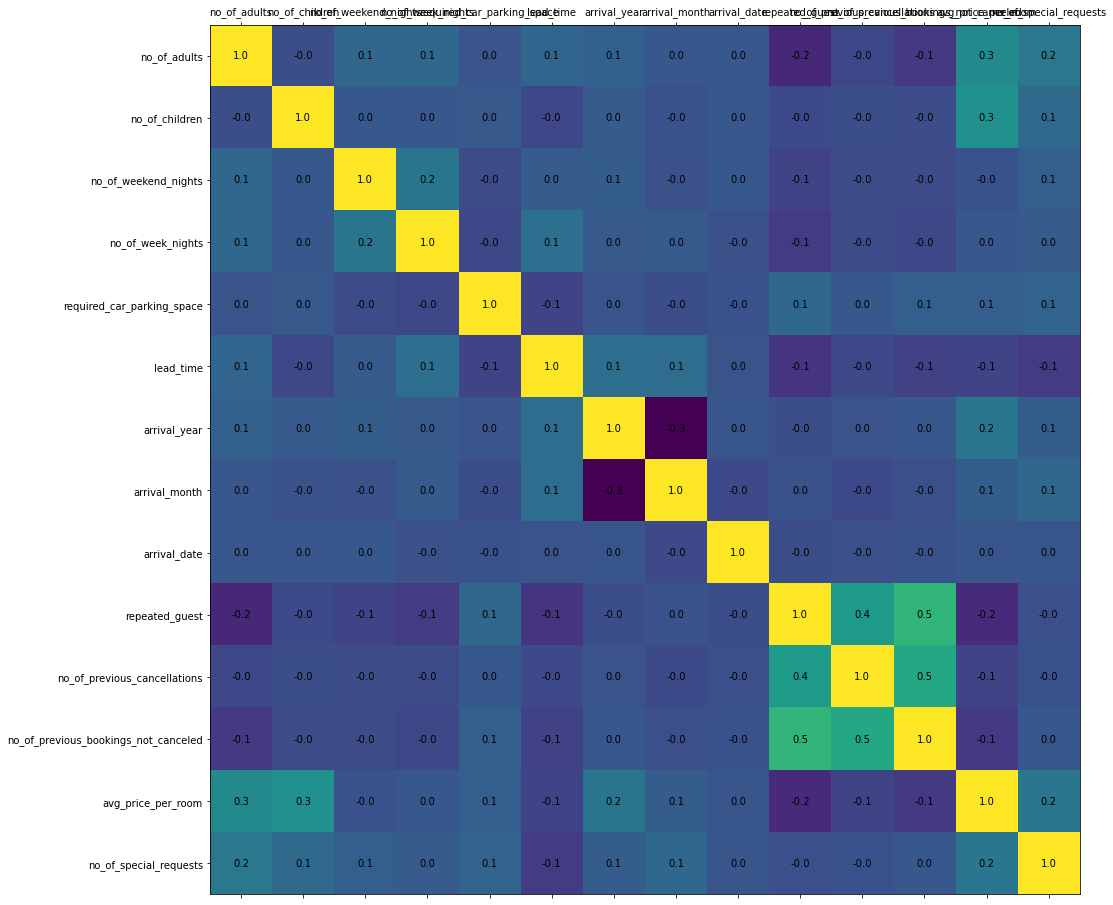

In [59]:
plot_corr(data.select_dtypes(exclude='object'), 16)

#### There seems to be very little correlation inbetween our predictor variables. However, no_of_previous_cancellations is exhibiting some correlation with no_of_previous_bookings_not_canceled. We can safely drop one of them because they serve the same function intuitively. We will drop no_of_previous_cancellations because the EDA demonstrated that is a key factor in predicting the booking_status.

In [60]:
inn_df.drop('no_of_previous_cancellations', axis=1, inplace=True)

In [61]:
#inn_df.columns = inn_df.columns.str.replace(' ', '_')

## Building a Logistic Regression model

In [61]:
inn_df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'repeated_guest', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'reserved_Room_Type_2', 'reserved_Room_Type_3', 'reserved_Room_Type_4',
       'reserved_Room_Type_5', 'reserved_Room_Type_6', 'reserved_Room_Type_7',
       'market_type_Complementary', 'market_type_Corporate',
       'market_type_Offline', 'market_type_Online'],
      dtype='object')

In [120]:
#inn_df.lead_time = inn_df['lead_time'].apply(lambda x: 0.0 if (np.isnan(x) == True) else x)

In [121]:
# prepare the training and test data

X = inn_df.drop('booking_status', axis=1)
y = inn_df.booking_status

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [130]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(inn_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(inn_df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [131]:
print("Original Booking Cancellations    : {0} ({1:0.2f}%)".format(len(inn_df.loc[inn_df['booking_status'] == 1]), (len(inn_df.loc[inn_df['booking_status'] == 1])/len(inn_df.index)) * 100))
print("Original Booking Confirmations   : {0} ({1:0.2f}%)".format(len(inn_df.loc[inn_df['booking_status'] == 0]), (len(inn_df.loc[inn_df['booking_status'] == 0])/len(inn_df.index)) * 100))
print("")
print("Training Booking Cancellations    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Booking Confirmations   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Booking Cancellations        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Booking Confirmations       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Booking Cancellations    : 11885 (32.76%)
Original Booking Confirmations   : 24390 (67.24%)

Training Booking Cancellations    : 8278 (32.60%)
Training Booking Confirmations   : 17114 (67.40%)

Test Booking Cancellations        : 3607 (33.14%)
Test Booking Confirmations       : 7276 (66.86%)



#### The percentage of cancellations and confirmations is similar in training and testing data, which is a good indication of the randomness of the sample data distribution

In [132]:
# Fit the model on train
lg_model = LogisticRegression(solver='newton-cg', random_state=1)
lg_model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

### Evaluation of performance on training set

In [133]:
# predict on test
y_pred_train = lg_model.predict(X_train)

In [134]:
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.796471329552615
Precision: 0.7415346380863622
Recall: 0.5767093500845615
F1: 0.6488176134819245


### Evaluation of performance on testing set

In [135]:
# predicting on the test set
y_pred_test = lg_model.predict(X_test)

In [136]:
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.793163649728935
Precision: 0.7494481236203091
Recall: 0.5647352370390907
F1: 0.6441106719367589


### Observations
* The overall accuracy of approximately 0.8 is good - considering we have fairly balanced target data
* Accuracy, Precision, and Recall data in train and test are similar - a good indicator of right-fitting of the model
* The Precision and F1 score is higher in test than in train data
* Recall is low


## Model performance evaluation

Optimization of Logistic Regression using the statsmodels library

In [72]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [73]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [74]:
X_backup = X.copy()
# adding constant
X = sm.add_constant(X)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [75]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25367
Method:                           MLE   Df Model:                           24
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.3322
Time:                        20:45:01   Log-Likelihood:                -10742.
converged:                      False   LL-Null:                       -16085.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -892.4249    119.568     -7.464      0.000   -1126.774    -658.076
no_of_adults                             0.0657      

In [76]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805057,0.638497,0.734306,0.683058


Observations

* The positive coefficient values in no_of_weekend_nights, lead_time, and avg_price_per_room, indicate positive correlation with a canceled value in our target variable booking_status - the more weekend nights are requested, or longer lead time in the reservation, or higher the room price, the higher likelyhood there will be a cancellation of the booking

* The negative coefficient values in type_of_meal_plan, required_car_parking_space, arrival_month, no_of_special_requests, etc.the least likely there will be a cancellation of a booking

* The inferences are valid to the extent the aforementioned features have statistically significant p-values, lower than 0.05 (5 percent) significance level. The p-values and possibly the coefficient values are impacted by the existence of collinearities in the independent variables. These shall be examined and optimizations made as needed. Subsequently, statistically insignificant features with p-values greater than 0.05 will be dropped





In [77]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   3.865913e+07
no_of_adults                            1.334459e+00
no_of_children                          1.933137e+00
no_of_weekend_nights                    1.056837e+00
no_of_week_nights                       1.089475e+00
type_of_meal_plan                       1.396793e+00
required_car_parking_space              1.035140e+00
lead_time                               1.353298e+00
arrival_year                            1.395380e+00
arrival_month                           1.263957e+00
arrival_date                            1.005789e+00
repeated_guest                          1.653364e+00
no_of_previous_bookings_not_canceled    1.405222e+00
avg_price_per_room                      1.897119e+00
no_of_special_requests                  1.248776e+00
reserved_Room_Type_2                    1.086868e+00
reserved_Room_Type_3                    1.004791e+00
reserved_Room_Type_4                    1.345268e+00
reserved_Ro

Observations

* Only market_type_Online and market_type_Offline have significant VIF. market_type_Offline will be dropped.  

In [78]:
X_train1 = X_train.drop("market_type_Offline", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                   3.852884e+07
no_of_adults                            1.318573e+00
no_of_children                          1.932870e+00
no_of_weekend_nights                    1.055874e+00
no_of_week_nights                       1.089098e+00
type_of_meal_plan                       1.396502e+00
required_car_parking_space              1.034842e+00
lead_time                               1.344479e+00
arrival_year                            1.391091e+00
arrival_month                           1.263084e+00
arrival_date                            1.005766e+00
repeated_guest                          1.650050e+00
no_of_previous_bookings_not_canceled    1.404635e+00
avg_price_per_room                      1.896777e+00
no_of_special_requests                  1.248372e+00
reserved_Room_Type_2                    1.086842e+00
reserved_Room_Type_3                    1.004791e+00
reserved_Room_Type_4                    1.335944e+00
reserved_Ro

In [79]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

         Current function value: 0.423814
         Iterations: 35
Training performance:


,Accuracy,Recall,Precision,F1
0,0.807026,0.644003,0.736381,0.687101


#### Using train-set, little or no change from dropping market_type_Offline to eliminate collinearities

#### Examine impact on test-set

In [80]:
X_test1 = X_test.drop("market_type_Offline", axis=1)

In [81]:
logit1t = sm.Logit(y_test, X_test1.astype(float))
lg1t = logit1t.fit()

print("Test performance:")
model_performance_classification_statsmodels(lg1t, X_test1, y_test)

         Current function value: 0.428243
         Iterations: 35
Test performance:


,Accuracy,Recall,Precision,F1
0,0.803271,0.618522,0.733378,0.671071


#### Statistically insignificant features need to be dropped. It will be done incrementally

In [82]:
print(lg1t.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                10883
Model:                          Logit   Df Residuals:                    10859
Method:                           MLE   Df Model:                           23
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.3204
Time:                        20:45:04   Log-Likelihood:                -4660.6
converged:                      False   LL-Null:                       -6858.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -830.1802    180.522     -4.599      0.000   -1183.998    -476.363
no_of_adults                             0.0856      

In [83]:
X_train2 = X_train1.drop(["arrival_date", "no_of_adults", "no_of_children", "no_of_week_nights", \
                          "no_of_previous_bookings_not_canceled", "reserved_Room_Type_3", \
                          "market_type_Complementary"], axis=1)

In [84]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Optimization terminated successfully.
         Current function value: 0.424094
         Iterations 11
Training performance:


,Accuracy,Recall,Precision,F1
0,0.806829,0.644721,0.735491,0.687121


In [85]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25375
Method:                           MLE   Df Model:                           16
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.3305
Time:                        20:45:05   Log-Likelihood:                -10769.
converged:                       True   LL-Null:                       -16085.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -921.8957    118.970     -7.749      0.000   -1155.072    -688.719
no_of_weekend_nights           0.1439      0.020      7.353      0.000       0.106 

In [86]:
X_test2 = X_test1.drop(["arrival_date", "no_of_adults", "no_of_children", "no_of_week_nights", \
                          "no_of_previous_bookings_not_canceled", "reserved_Room_Type_3", \
                          "market_type_Complementary"], axis=1)

In [87]:
logitalpha = sm.Logit(y_test, X_test2.astype(float))
lgalpha = logitalpha.fit()

print("Test performance:")
model_performance_classification_statsmodels(lgalpha, X_test2, y_test)

Optimization terminated successfully.
         Current function value: 0.428721
         Iterations 11
Test performance:


,Accuracy,Recall,Precision,F1
0,0.803271,0.619088,0.733065,0.671273


### Improve performance of ROC-AUC using threshold optimization 

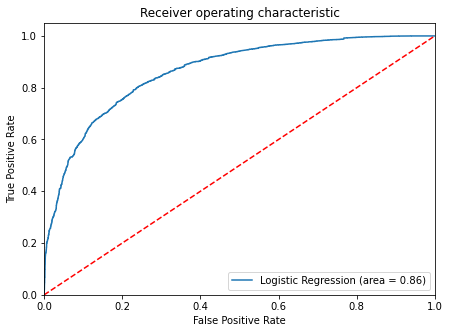

In [88]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Logit Model performance on the training set is good

In [89]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.29905628512515253


#### Generate confusion_matrix with the 0.3 derived threshold

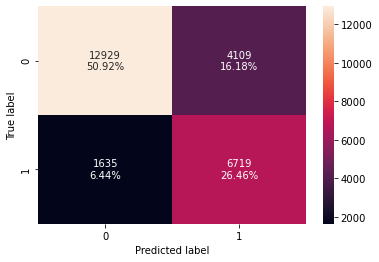

In [90]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

#### Check the model performance using this 0.2939 threshold

In [91]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.773787,0.804285,0.620521,0.700553


Observations

* Accuracy reduced marginally
* Recall increased significantly
* Precision reduced significantly
* F1 appreciated

#### Check performance for test using this same 0.3 threshold

In [92]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_train_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.762841,0.788728,0.602814,0.683352


#### The test results have consistently been close to the training, which suggests right-fitting

### Let's use Precision-Recall curve and see if we can improve on the threshold

In [93]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

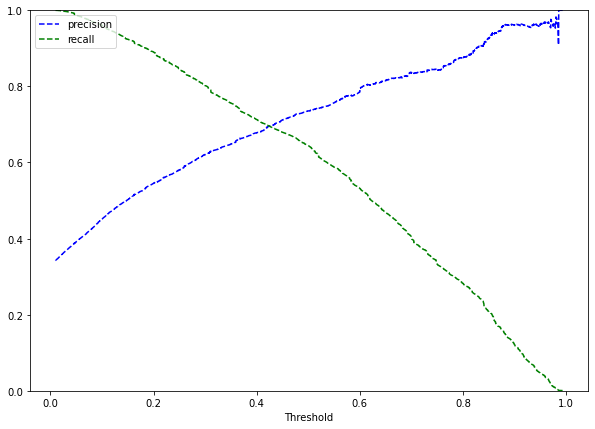

In [94]:
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [95]:
# setting the threshold
optimal_threshold_curve = 0.43

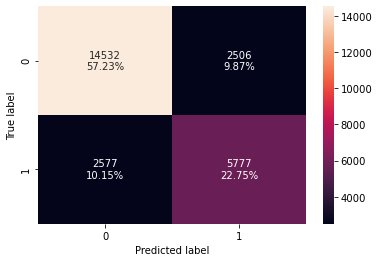

In [96]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [97]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.799819,0.691525,0.697453,0.694476


### There is balance between recall and precision, while accuracy and F1 are marginally improved.

## Final Model Summary

### Because the business objective is to minimize cancellations by being able to anticipate and ameliorate their effects, Recall is more important than the Precision. Moreover, the determinant of the Recall is the amount of False Negatives FN. The lower the FN, the higher the Recall. Therefore, the result obtained with a threshold of 0.3 is the best for our purpose. It has the highest Recall rate and comparable F1 with all the other results.

In [98]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=0.3
)
print("Test performance:")
log_reg_model_train_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.763484,0.787879,0.603864,0.683706


### Converting coefficients to odds
The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
Therefore, odds = exp(b)
The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [99]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_test2.columns).T

,const,no_of_weekend_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,avg_price_per_room,no_of_special_requests,reserved_Room_Type_2,reserved_Room_Type_4,reserved_Room_Type_5,reserved_Room_Type_6,reserved_Room_Type_7,market_type_Corporate,market_type_Online
Odds,0.0,1.154811,0.929729,0.216179,1.016587,1.575592,0.957224,0.202046,1.021617,0.228854,0.775901,0.731762,0.353818,0.527938,0.417188,2.218773,5.532204
Change_odd%,-100.0,15.481057,-7.027102,-78.382112,1.658726,57.559239,-4.277581,-79.795394,2.161666,-77.114594,-22.409867,-26.823821,-64.618204,-47.206240,-58.281180,121.877333,453.220358


### Coefficient interpretations

lead_time: Holding all other features constant a unit change of 0.229 in lead_time will increase the odds of a cancellation by 1.017 times or a 1.68% increase in odds.

no_of_special_requests: Holding all other features constant a unit change in no_of_special_requests will decrease the odds of a customer being a defaulter by 0.229 times or a 77.11% decrease in the odds.

avg_price_per_room: Holding all other features constant, a unit change in avg_price_per_room will increase the odds of cancellation by 1.02 or a 2.21% increase in the odds of a cancellation. 

market_type_Online: Holding other features constant, a hotel room reserved online will 5.53 times more likely to be canceled.

no_of_special_requests: Holding other features constant, a unit increase in the no_of_special_requests leads to a decrease in the odd of cancellation by 77%

Interpretation for other attributes can be done similarly.

## Building a Decision Tree model

In [100]:
inn_df = data2.copy()

In [101]:
# prepare the training and test data

X = inn_df.drop('booking_status', axis=1)
y = inn_df.booking_status

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [103]:
# Fit the model on train
dt_model = DecisionTreeClassifier(criterion='gini', random_state=3)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=3)

In [104]:
print("Accuracy on training set : ",dt_model.score(X_train, y_train))
print("Accuracy on test set : ",dt_model.score(X_test, y_test))

Accuracy on training set :  0.9938957151858853
Accuracy on test set :  0.8689699531379216


#### The prelimenary results are good, however, accuracy is not a sufficient measure of model performance.

In [105]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [106]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [107]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [108]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### We shall generate a confusion matrix for our decision tree model and compute the Recall rate which is our most compelling metric.

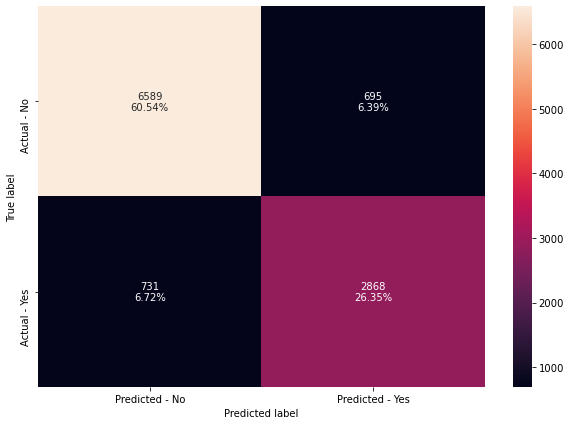

In [109]:
make_confusion_matrix(dt_model,y_test)

In [110]:
# Recall on train and test
get_recall_score(dt_model)

Recall on training set :  0.9840695148443157
Recall on test set :  0.7968880244512364


### The performance of our model is good as a starting point. The Recall on the test set is substantive like the Accuracy.

In [111]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'reserved_Room_Type_2', 'reserved_Room_Type_3', 'reserved_Room_Type_4', 'reserved_Room_Type_5', 'reserved_Room_Type_6', 'reserved_Room_Type_7', 'market_type_Complementary', 'market_type_Corporate', 'market_type_Offline', 'market_type_Online']


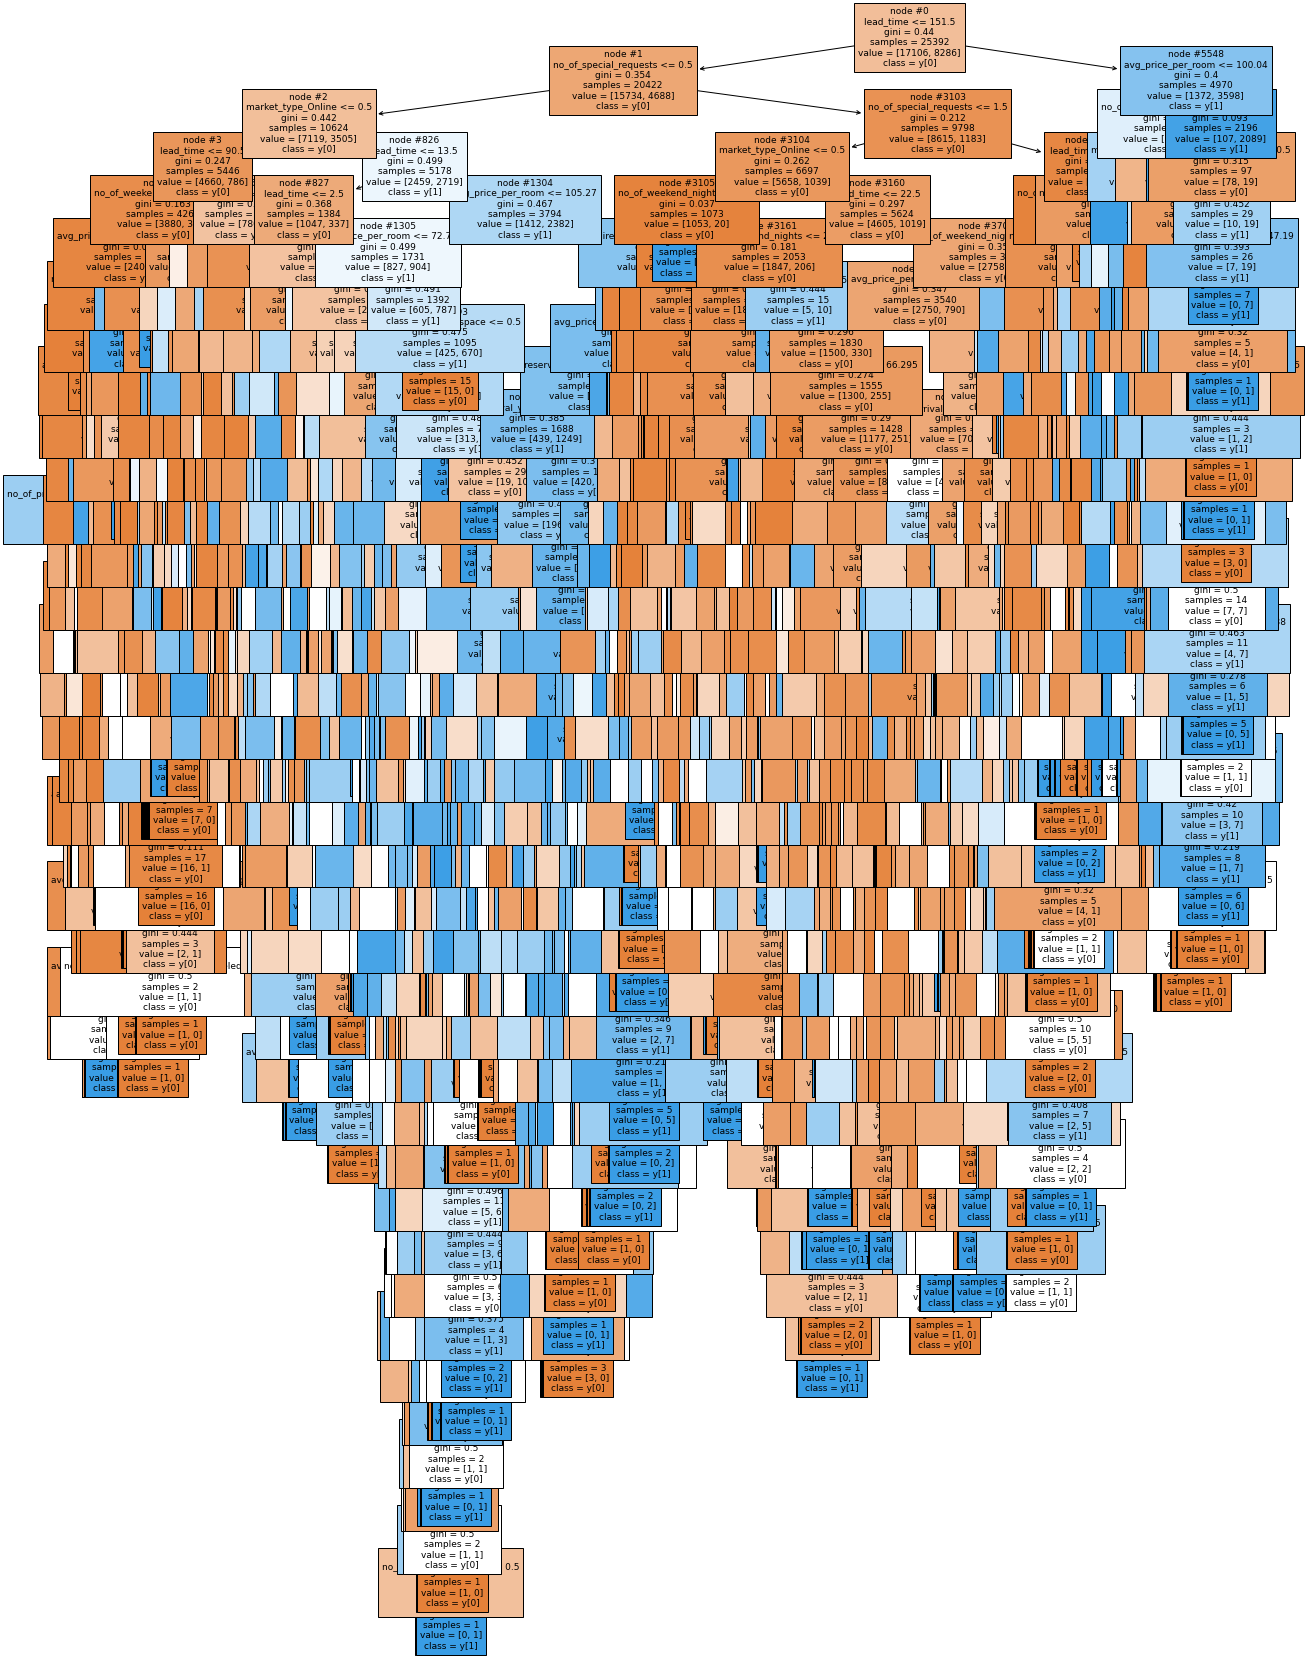

In [112]:
plt.figure(figsize=(20,30))
tree.plot_tree(dt_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

### The decision tree is overly complex and is bound to overfit test data. Even though it has a 0.79 recall, it is difficult to see how a tree so complex can generalize the data.

### It is pertinent to identify the most important features that influence our target variable and classification - the cancellation of a hotel booking

In [113]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.352802
avg_price_per_room                    0.163783
market_type_Online                    0.094532
arrival_date                          0.080542
arrival_month                         0.070444
no_of_special_requests                0.068586
no_of_week_nights                     0.048904
no_of_weekend_nights                  0.038807
no_of_adults                          0.026441
arrival_year                          0.011553
type_of_meal_plan                     0.010585
required_car_parking_space            0.006925
no_of_children                        0.006915
reserved_Room_Type_4                  0.006737
market_type_Offline                   0.006106
market_type_Corporate                 0.002099
reserved_Room_Type_2                  0.001190
reserved_Room_Type_5                  0.000897
reserved_Room_Type_6                  0.000733
repeated_guest                        0.000556
reserved_Room

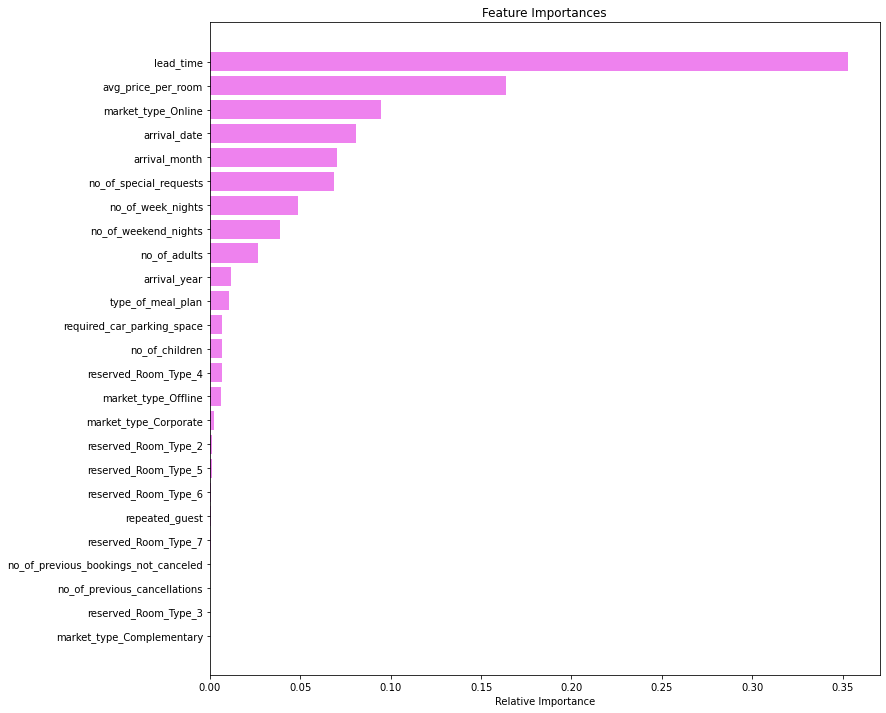

In [114]:
importances = dt_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Before optimization through hyperparameter tuning, features that rank as the least important will be removed as this will reduce the complexity of our decision tree.

Most of the features are being removed as predictors because their importance ranking is very low, other feature removals are intuitive given business considerations

For example:

* the effect of type_of_meal_plan, or required_car_parking_space, on the decision to cancel or not is captured in no_of_special_requests
* the impact of arrival_date, and arrival_year, is captured in no_week_nights, and no_weekend_nights
* market_type_Offline, market_type_Corporate - the bottom line seems to be whether reservation is online or not

### Our decision tree needs to be pruned. GridSearch will be used for hyperparameter tuning¶


In [115]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=3)

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10],
    "criterion": ["gini"],
    "splitter": ["best"],
    'min_samples_leaf' : [100, 200,300,400,500],
    'min_impurity_decrease': [0.00001,0.0001,0.001,0.01]
}


# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.01,
                       min_samples_leaf=100, random_state=3)

### Evaluate performance on training set after pruning

In [116]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.799543,0.721699,0.682337,0.701466


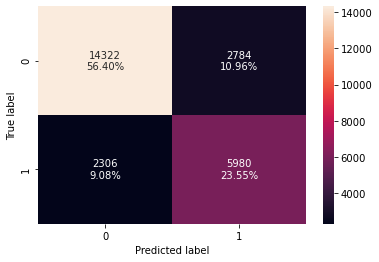

In [117]:
confusion_matrix_sklearn(estimator, X_train, y_train)

### Evaluate performance on test set after pruning

In [118]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.799688,0.728814,0.685393,0.706437


### The pruning exercise has resulted in lower performance measures. Accuracy, Recall, Precision, and F1, have all declined in both training and test data. However, the Recall which is our critical benchmark has not drastically changed. While it has dropped, we now have a more generalized tree that reflects the the most important features and the impact of their values on the decision to cancel or confirm a booking. The details of the decision tree are also intuitive.

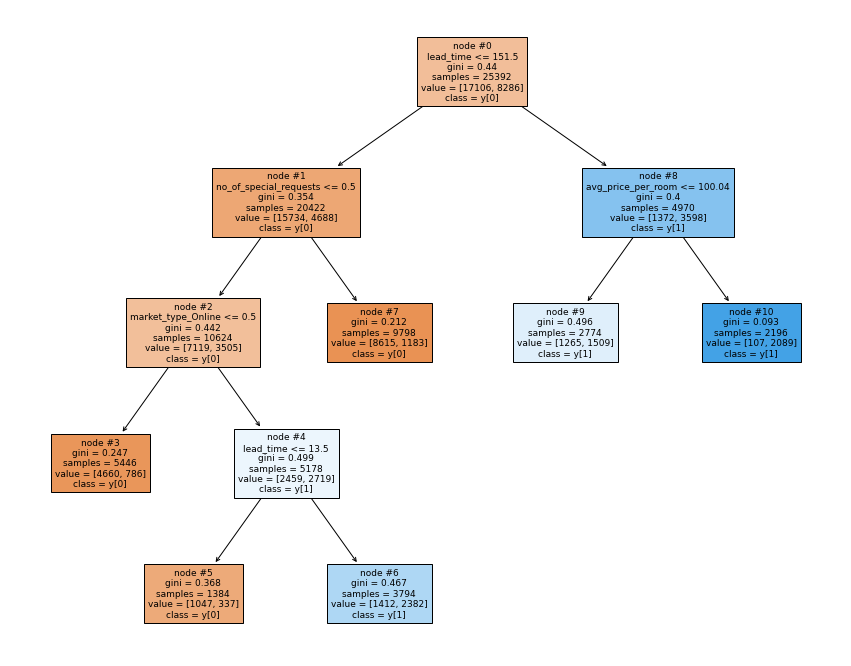

In [119]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

### Examine feature importances post pruning

In [120]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.581419
market_type_Online                    0.198585
no_of_special_requests                0.115078
avg_price_per_room                    0.104918
market_type_Offline                   0.000000
market_type_Corporate                 0.000000
market_type_Complementary             0.000000
reserved_Room_Type_7                  0.000000
reserved_Room_Type_6                  0.000000
reserved_Room_Type_5                  0.000000
reserved_Room_Type_4                  0.000000
reserved_Room_Type_3                  0.000000
reserved_Room_Type_2                  0.000000
no_of_adults                          0.000000
no_of_children                        0.000000
no_of_previous_cancellations          0.000000
repeated_guest                        0.000000
arrival_date                          0.000000
arrival_month                         0.000000
arrival_year                          0.000000
required_car_

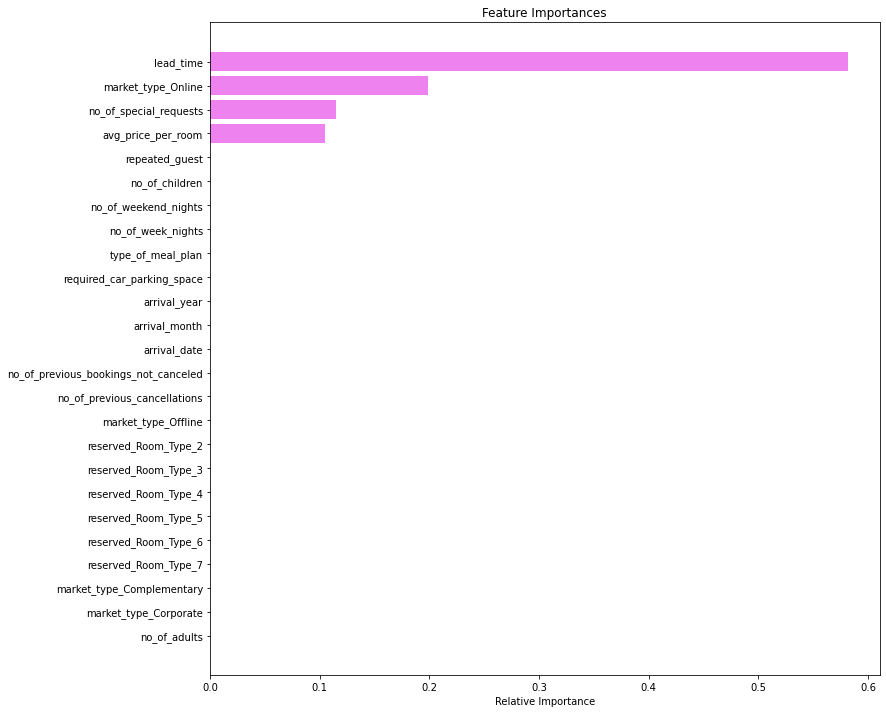

In [121]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Do we need to prune the tree?

## Model Performance Comparison and Conclusions

In [122]:
print('Logistic regression model out of sample results:')
log_reg_model_train_perf_threshold_auc_roc

Logistic regression model out of sample results:


,Accuracy,Recall,Precision,F1
0,0.763484,0.787879,0.603864,0.683706


In [123]:
print('Decision tree (CART) model out of sample results:')
decision_tree_tune_perf_test

Decision tree (CART) model out of sample results:


,Accuracy,Recall,Precision,F1
0,0.799688,0.728814,0.685393,0.706437


### Observations

* Both the logistic regression and the decision tree (CART) performed modestly when all metrics are considered.

* The decision tree yielded marginally better accuracy as well as F1 score

* The decision tree yielded better precision.

* The logistic regression model generated a better recall


## Actionable Insights and Recommendations

In the final analysis, both the regression model and the decision tree expose factors that influence cancellations.

* The decision tree ranks the importances of contributing features towards cancellation. Overwhelmingly, the greatest factor that influences cancellations based on this model is lead_time. 

* The greater the time between the booking and the check-in date, the greater the likelyhood of a cancellation. 

* Our logistic regression model enables estimation of the likelyhood of a cancellation given lead_time:

* A unit change of 0.229 in lead_time will increase the odds of a cancellation by 1.017 times - or a 1.68% increase in odds. Therefore, a lead_time of 1 day will result in over 5% increase in odds. It would be instructive to encourage reservations as close as possible to the checkin date. The EDA of lead_time revealed that most cancellations occured above the median number of days - 57 days.

* The market_type_Online is the second most influential feature identified by our decision tree model. 

* Reservations made online are more likely to get canceled than others.

* A hotel room reserved online is 5.53 times more likely to be canceled.

* no_of_special_requests

* A unit change in avg_price_per_room will increase the odds of cancellation by 1.02 or a 2.21% increase in the odds of a cancellation. 

* A unit increase in the no_of_special_requests leads to a decrease in the odds of cancellation by 77%



Both EDA and machine learning models revealed that customers that tend to make a fair amount of special requests do not cancel. This is probably an indication of their seriousness. Likewise corporate customers rarely cancel.

Online customers are constantly shopping for better deals and will cancel whenever they find better options. These are the category of customers that must be handled with caution.


* Penalize cancellations that are last minute with a non-refundable 20% deposit. People do not like to waste their money.

* Customers that maintain a track record of bookings without cancellations can be exempt from this non-refundable deposit

* Long-term reservations should be either discouraged or made at a premium room price. Free cancellation of a long term reservation should only be permitted if it is done within a company determined time window. For example, reservations whose lead_times exceed 50 days should only be canceled 2 weeks before check in. This gives enough window for the room to be resold.

* Long-term bookings must be paid in full by a certain date before check in and will be subject to hefty penalty before a refund is issued.

* provide incentives for customers not to cancel. For instance, start a loyalty program. Offer complimentary reservations for customers frequent customers that are not repeat cancelers.

* Find out and log the specific reasons for cancellation: for example, if customer has found a better deal, verify and match it in order to prevent loss of the business.

* Encourage non-corporate customers to book their rooms as close as possible to their check in dates

INNHotels must diversify their customer base so that they are not as heavily dependent on the online deal merchants. Currently, they don't appear to be catering much for families because the number of reservations being made for children is low. They also need to market more to the aviation market that has tourists, more apt to confirm their bookings.

Room turnover rate is high between 1 and 2 days for weekends and weekdays, respectively, leaving a corresponding need to get new reservations.  INNHotels must improve competitiveness by improved offerings both to get more bookings, and to insentivize longer stay.

The no_of_previous_cancellations and no_of_previous_bookings_not_canceled should be a key feature in predicting the booking_status cancellation. There is presently  data for  only repeated_guests who are less than 3% of the reservations in the sample. For this reason, the importance ranking in the decision tree model for these two features was insignificant. Apparently, too the INNHotels is possibly not getting repeat customers.




 